## Importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Overview of the dataset

In [24]:
df = pd.read_csv('C:/Users/User/Downloads/Project 3/Diabetes_Dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.shape

(768, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Peforming Cleaning of the dataset

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
#Clearly there are no missing values or duplicate values.
#Now we check for outliers using IQR method
for col in df.columns:
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    lower_lim = q25 - 1.5*iqr
    upper_lim = q75 + 1.5*iqr
    outliers = df[(df[col] < lower_lim) | (df[col] > upper_lim) ]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")
    df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)] #Removing the outliers

Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 5
Number of outliers in BloodPressure: 45
Number of outliers in SkinThickness: 1
Number of outliers in Insulin: 27
Number of outliers in BMI: 10
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 11
Number of outliers in Outcome: 0


## Performing Exploratory Analysis

In [31]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130759,0.206581,-0.088675,-0.090608,0.037389,-0.013274,0.582318,0.235631
Glucose,0.130759,1.000000,0.227750,0.017161,0.280328,0.193989,0.051546,0.268977,0.493355
BloodPressure,0.206581,0.227750,1.000000,0.039799,-0.019897,0.290307,0.022308,0.345872,0.171178
SkinThickness,-0.088675,0.017161,0.039799,1.000000,0.475258,0.383783,0.165758,-0.122427,0.042490
Insulin,-0.090608,0.280328,-0.019897,0.475258,1.000000,0.177380,0.225171,-0.053711,0.114653
BMI,0.037389,0.193989,0.290307,0.383783,0.177380,1.000000,0.148256,0.066110,0.268268
DiabetesPedigreeFunction,-0.013274,0.051546,0.022308,0.165758,0.225171,0.148256,1.000000,0.031168,0.168112
Age,0.582318,0.268977,0.345872,-0.122427,-0.053711,0.066110,0.031168,1.000000,0.267017
Outcome,0.235631,0.493355,0.171178,0.042490,0.114653,0.268268,0.168112,0.267017,1.000000


<AxesSubplot:>

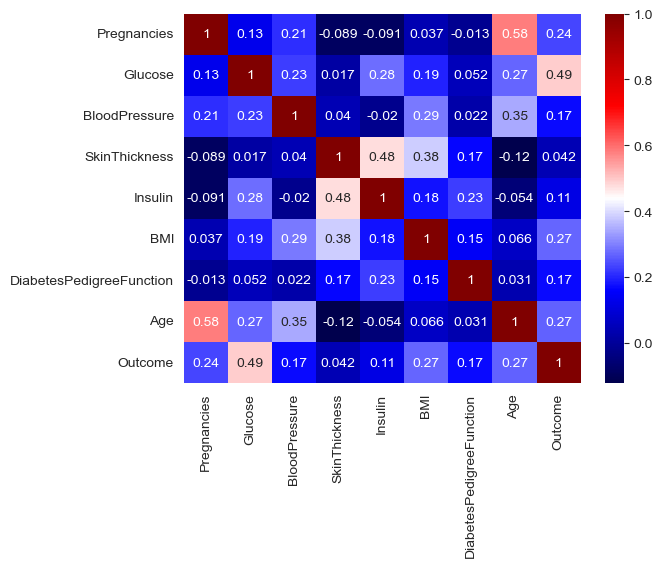

In [32]:
sns.heatmap(df.corr(), cmap='seismic', annot=True)
#Clearly from the heatmap, we can infer that Pregnancy, Glucose, BMI and Age are the factors that higly influence the outcome.
#These are the features that should be taken into high consideration while prediction.

In [33]:
# sns.pairplot(df, hue = "Outcome")
# plt.show()

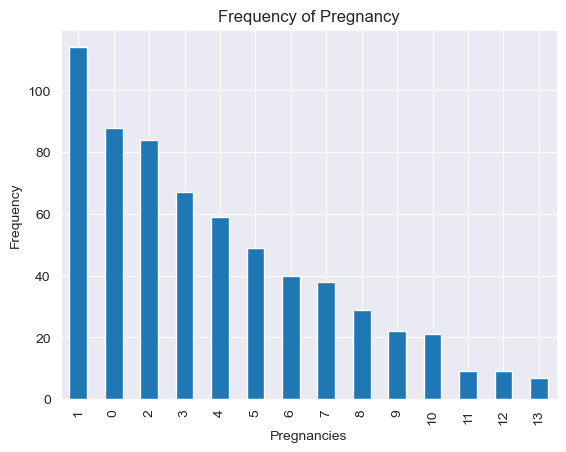

In [34]:

counts = df['Pregnancies'].value_counts()

counts.plot(kind='bar')

plt.title('Frequency of Pregnancy')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

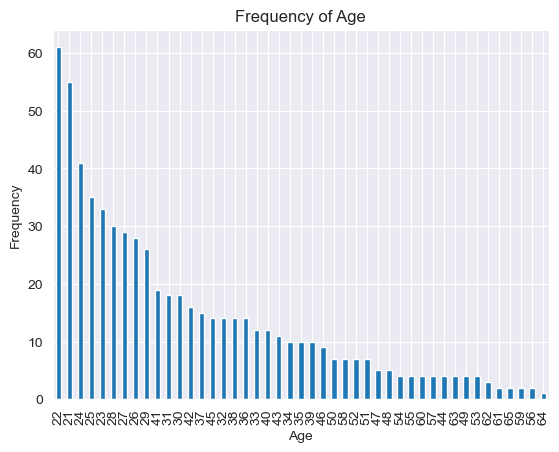

In [35]:

counts = df['Age'].value_counts()
counts.plot(kind='bar')

plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Importing necessary libraries for performing classification using random forest

In [36]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

## #Performing resampling to create a balanced dataset

In [37]:
df_major = df[(df['Outcome']==0)]
df_minor = df[(df['Outcome']==1)]

minor_upsampled = resample(df_minor, replace=True, n_samples=len(df_major), random_state=42)
upsampled_data = pd.concat([df_major, minor_upsampled])

upsampled_x = upsampled_data.drop(columns='Outcome')
upsampled_y = upsampled_data['Outcome']

<AxesSubplot:xlabel='Outcome', ylabel='count'>

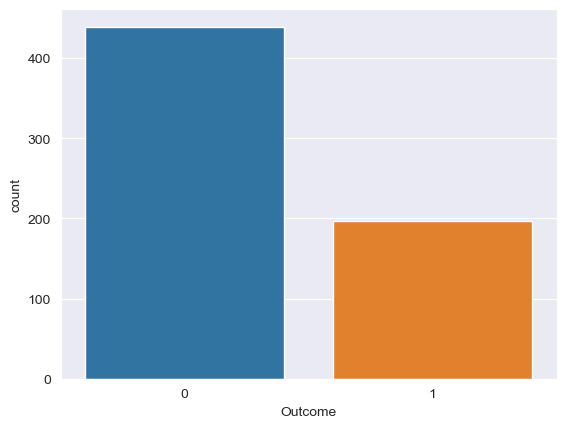

In [38]:
#Checking sampled data
sns.countplot(x=df['Outcome']) #before sampling

<AxesSubplot:xlabel='Outcome', ylabel='count'>

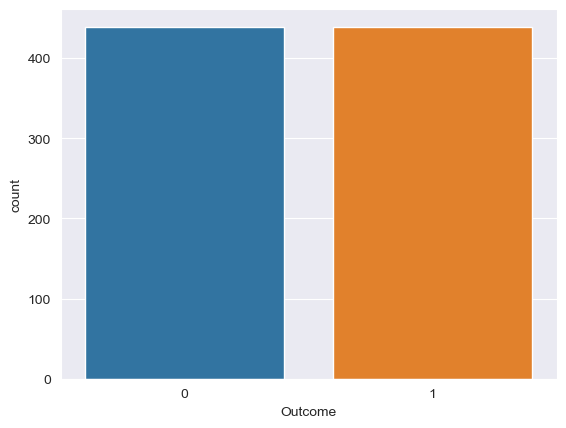

In [39]:
sns.countplot(x=upsampled_data['Outcome']) #after sampling

## Peforming Train Test Split

In [40]:
X = upsampled_x
Y = upsampled_y 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)

## Performing Classification using Random Forest Classifier

Best hyperparameters:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Train score:  0.9501424501424501
Test score:  0.8465909090909091
f1 score:  0.8460082861923351
Accuracy:  0.8465909090909091


Text(52.722222222222214, 0.5, 'Actual')

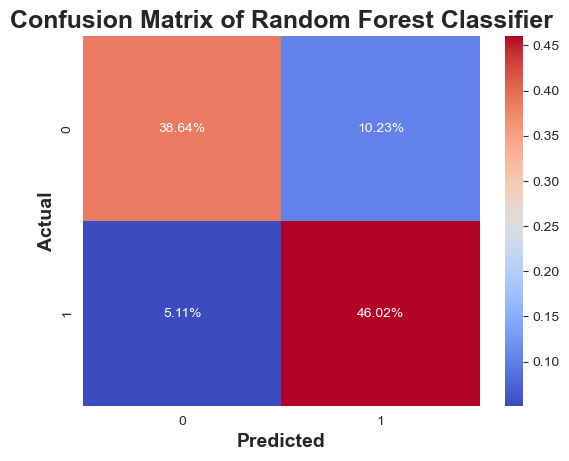

In [41]:
rfc = RandomForestClassifier()

params = {
    'n_estimators': [10,25,50,75,100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rfc, params, cv=5)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters: ", grid_search.best_params_)

#getting associated grid score
train_score = grid_search.score(X_train, Y_train)
test_score = grid_search.score(X_test, Y_test)

Y_pred = grid_search.predict(X_test)

# Computing accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
f1_score_rfc = f1_score(Y_test, Y_pred, average='weighted')

#Printing the scores
print("Train score: ", train_score)
print("Test score: ", test_score)
print("f1 score: ", f1_score_rfc)
print("Accuracy: ", accuracy)

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=18)
plt.xlabel('Predicted', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold', fontsize=14)

In [42]:
Y = grid_search.predict(X_test)
print(Y)

[1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0]


In [43]:
import pickle

In [44]:
pickle.dump(grid_search, open('model.pkl','wb'))

In [54]:
data = {
    'Pregnancies': [3],
    'Glucose': [100],
    'BloodPressure': [110],
    'SkinThickness': [2],
    'Insulin': [500],
    'BMI': 27,
    'DiabetesPedigreeFunction': [2],
    'Age': [19]
}

df = pd.DataFrame(data)

prediction = grid_search.predict(df)
output = prediction[0]
output


0